In [2]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os

## 데이터 불러오기

In [3]:
Data = np.zeros([52, 8])


file_dir = './NEW DATA/DOE' # csv위치 폴더
file_list = os.listdir(file_dir)

for i in range(len(file_list)):
    tmp = pd.read_csv(file_dir + '/' + file_list[i])                           # 파일 불러오기
    Data[i, :4]   = tmp.iloc[0, 1:]                                            # 초기값(모니터링 변수) 저장
    Data[i, 4:-2] = [float(file_list[i][3:6]), float(file_list[i][8:10])]      # P, I값 저장
    Data[i, -2] = tmp.shape[0]                                                 # 전체 공정시간 저장 (아마 사용 X)
    
    idx = np.where(tmp.iloc[:, 0] == 'eSTERILIZATION')[0][0]                   # 멸균 직전 시간까지 index 가져오기
    Data[i, -1] = tmp.iloc[:idx, :].shape[0]                                   # 조정단계까지 시간 저장

file_dir = './NEW DATA/OTHER' # csv위치 폴더
file_list = os.listdir(file_dir)
    
for i in range(len(file_list)):
    tmp = pd.read_csv(file_dir + '/' + file_list[i])                           # 파일 불러오기
    Data[i+45, :4]   = tmp.iloc[0, 1:]                                         # 초기값(모니터링 변수) 저장
    Data[i+45, 4:-2] = [float(file_list[i][3:6]), float(file_list[i][8:10])]   # P, I값 저장
    Data[i+45, -2] = tmp.shape[0]                                              # 전체 공정시간 저장 (아마 사용 X)
    
    idx = np.where(tmp.iloc[:, 0] == 'eSTERILIZATION')[0][0]                   # 멸균 직전 시간까지 index 가져오기
    Data[i+45, -1] = tmp.iloc[:idx, :].shape[0]                                # 조정단계까지 시간 저장
    
Data = pd.DataFrame(Data, columns = ['Plate Temp', 'Steam Temp', 'Vessel Pressure', 'Vessel Temp', 'P', 'I', 'Total Time', 'ADJ Time'])
Data

,Plate Temp,Steam Temp,Vessel Pressure,Vessel Temp,P,I,Total Time,ADJ Time
0,17.6,17.7,-0.01,17.7,0.1,10.0,3431.0,1659.0
1,18.5,18.6,-0.01,18.7,0.1,30.0,3442.0,1673.0
2,18.9,19.2,-0.01,19.0,0.1,50.0,3517.0,1737.0
3,54.7,82.3,0.00,56.5,0.1,70.0,3304.0,1536.0
4,20.9,21.0,-0.01,21.0,0.1,90.0,3485.0,1715.0
5,48.2,75.3,0.01,51.0,0.5,10.0,3259.0,1491.0
6,42.7,63.9,0.00,46.3,0.5,30.0,3310.0,1543.0
7,54.5,83.0,0.00,56.2,0.5,50.0,3324.0,1555.0
8,57.3,86.3,0.01,58.7,0.5,70.0,3401.0,1633.0
9,56.8,84.8,0.01,56.7,0.5,90.0,3490.0,1722.0


## 변동성 확인

In [10]:
PlotData = Data.copy()

for i in range(Data.shape[1]):
    PlotData.iloc[:, i] = Data.iloc[:, i] - np.min(Data.iloc[:, i])

PlotData

,Plate Temp,Steam Temp,Vessel Pressure,Vessel Temp,P,I,Total Time,ADJ Time
0,0.7,0.7,0.01,0.6,0.0,0.0,213.0,207.0
1,1.6,1.6,0.01,1.6,0.0,20.0,224.0,221.0
2,2.0,2.2,0.01,1.9,0.0,40.0,299.0,285.0
3,37.8,65.3,0.02,39.4,0.0,60.0,86.0,84.0
4,4.0,4.0,0.01,3.9,0.0,80.0,267.0,263.0
5,31.3,58.3,0.03,33.9,0.4,0.0,41.0,39.0
6,25.8,46.9,0.02,29.2,0.4,20.0,92.0,91.0
7,37.6,66.0,0.02,39.1,0.4,40.0,106.0,103.0
8,40.4,69.3,0.03,41.6,0.4,60.0,183.0,181.0
9,39.9,67.8,0.03,39.6,0.4,80.0,272.0,270.0


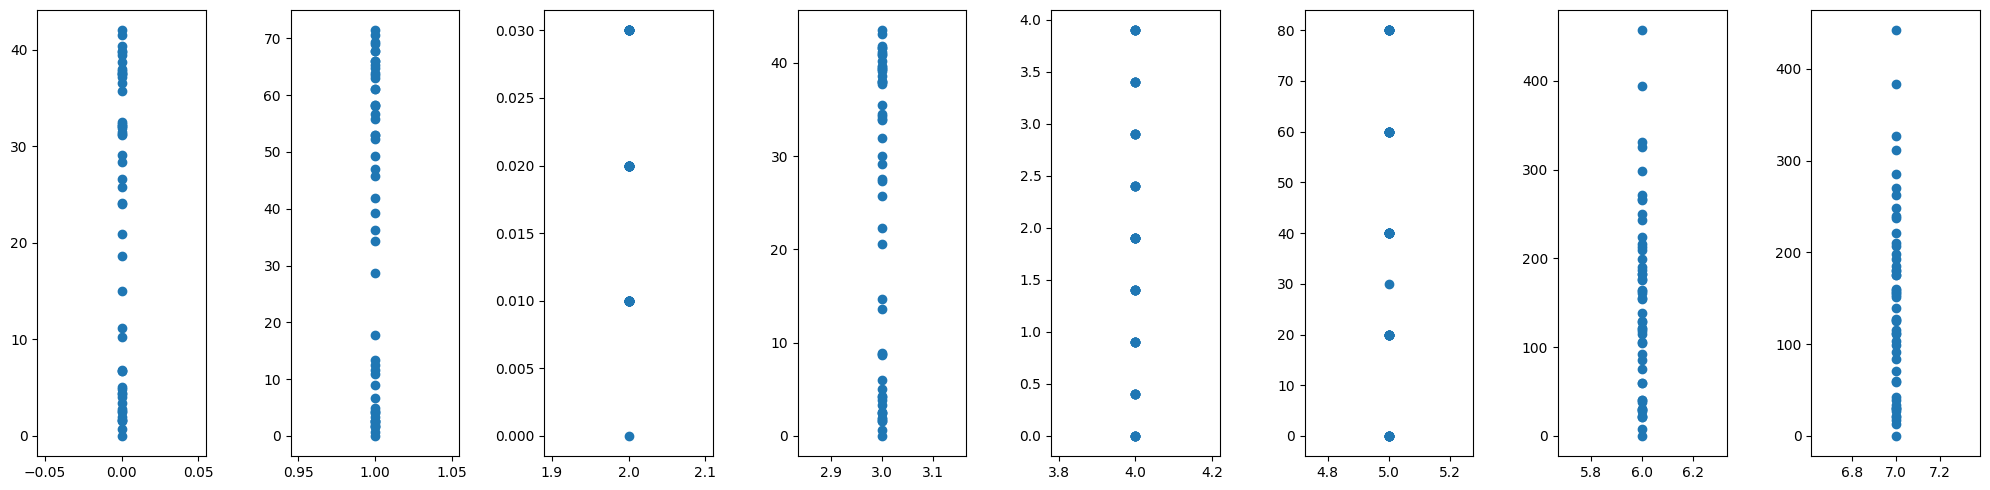

In [11]:
plt.figure(figsize = (20, 5))

for i in range(PlotData.shape[1]):
    plt.subplot(1, PlotData.shape[1], i+1)
    index = np.zeros(PlotData.shape[0])+i
    plt.scatter(index, PlotData.iloc[:, i])
    
plt.tight_layout(w_pad = 2)
plt.show()

In [12]:
TrainData  = np.array(Data.iloc[:45, :-2])
TrainLabel = np.array(Data.iloc[:45,  -1])
ValidData  = np.array(Data.iloc[45:, :-2])
ValidLabel = np.array(Data.iloc[45:,  -1])

## ANN GridSearch

In [4]:
LR          = [0.001, 0.0005, 0.0001]
NoOfLayers  = [2, 3, 4, 5, 6, 7]
NoOfNeurons = [4, 8, 16, 32, 64, 128, 256]
activFnc    = ['relu', 'elu', 'LeakyReLU']
Epoch       = 200000

In [5]:
def ANN(input_data, lr, layer, activ):
    Neurons = NoOfNeurons[:layer]
    
    random_seed = 777
    tf.keras.utils.set_random_seed(random_seed)
    
    keras.backend.clear_session() # 세션 지우기

    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape = (input_data.shape[1],) ))                                 # Input  Layer
    for i in range(layer):
        model.add(keras.layers.Dense(units = Neurons[-(i+1)], activation = '%s'%(activ), name = 'Hidden%d'%(i+1)))    # Hidden Layer 1
    model.add(keras.layers.Dense(units = 1,                                              name = 'Output'))     # Output Layer
    
    model.compile(optimizer = keras.optimizers.Adam(learning_rate = lr), # 최적화 알고리즘
                  loss = keras.losses.MAE,                               # 손실 함수(최적화 목적 함수)
                  metrics = ['mape'])                                    # 학습 과정에서 측정할 지표
    return model

In [ ]:
ES = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20000, restore_best_weights=True)

In [ ]:
# ANN_model = ANN(TrainData, LR[-1], NoOfLayers[-1], activFnc[-1])
# hist = ANN_model.fit(TrainData, TrainLabel, validation_data=(ValidData, ValidLabel),
#                      epochs=Epoch, verbose = 1, callbacks=[ES])

In [ ]:
cnt = 1
Final_Acc = pd.DataFrame(np.zeros([len(LR)*len(NoOfLayers)*len(activFnc), 8]))
for lr in LR:
    for layer in NoOfLayers:
        for activ in activFnc:
            ANN_model = ANN(TrainData, lr, layer, activ)
            
            # 모델 학습/검증
            hist = ANN_model.fit(TrainData, TrainLabel, validation_data=(ValidData, ValidLabel),
                                 epochs=Epoch, verbose = 0, callbacks=[ES])
#             Loss, Accuracy = ANN_model.evaluate(ValidData,  ValidLabel, verbose=0)

            ANN_model.save('./Model/Model_%d.h5'%(cnt))
            History = pd.DataFrame(hist.history)
            History.to_csv('./Result/Result_%d.csv'%(cnt), header = None, index = None)
            
            Final_Acc.iloc[cnt-1, 0]  = cnt
            Final_Acc.iloc[cnt-1, 1]  = lr
            Final_Acc.iloc[cnt-1, 2]  = layer
            Final_Acc.iloc[cnt-1, 3]  = activ
            Final_Acc.iloc[cnt-1, 4:] = History.iloc[-1, :]
            print(cnt, 'complete !')
            print('LR:', lr, '/', 'Layer:', layer, '/', 'Activ Func:', activ)
            print(History.iloc[-1, 0], History.iloc[-1, 1], History.iloc[-1, 2], History.iloc[-1, 3])
            print('---------------------------------------------------------------------------')
            cnt += 1

In [ ]:
Final_Acc = pd.DataFrame(np.zeros([len(LR)*len(NoOfLayers)*len(activFnc), 5]))

for cnt in range(Final_Acc.shape[0]):
    temp = pd.read_csv('./Result/Result_%d.csv'%(cnt+1), header = None)
    Final_Acc.iloc[cnt, 0]  = cnt+1
    Final_Acc.iloc[cnt, 1:] = temp.iloc[-1, :]

In [ ]:
Final_Acc

In [ ]:
Final_Acc.columns = ['No', 'T_MAE', 'T_MAPE', 'V_MAE', 'V_MAPE']

In [ ]:
Final_Acc.sort_values(by='V_MAPE')

In [ ]:
Final_Acc.to_csv('./Result/Final_Acc.csv', index = None)

In [ ]:
Final_Acc = pd.DataFrame(np.zeros([len(LR)*len(NoOfLayers)*len(activFnc), 5]))

for cnt in range(Final_Acc.shape[0]):
    temp = keras.models.load_model('./Model/Model_%d.h5'%(cnt+1))
    Final_Acc.iloc[cnt, 0]  = cnt+1
    Final_Acc.iloc[cnt, 1:3] = temp.evaluate(TrainData, TrainLabel, verbose = 0)
    Final_Acc.iloc[cnt, 3:] = temp.evaluate(ValidData, ValidLabel, verbose = 0)

In [ ]:
Final_Acc.columns = ['No', 'T_MAE', 'T_MAPE', 'V_MAE', 'V_MAPE']
Final_Acc

## final 결과 불러오기

In [6]:
Final_Acc = pd.read_csv('./Result/Final_Acc.csv')
Final_Acc

,No,T_MAE,T_MAPE,V_MAE,V_MAPE
0,1.0,1178.199951,74.491730,1312.276245,76.476944
1,2.0,71.467613,4.498118,137.100250,7.688654
2,3.0,46.197460,2.888440,64.080185,3.555088
3,4.0,18.494617,1.176128,90.654106,5.013322
4,5.0,27.438080,1.690594,91.583023,5.132225
5,6.0,32.840618,2.077632,83.980019,4.739732
6,7.0,62.355610,3.972429,82.979546,4.659920
7,8.0,50.610672,3.259457,70.641602,3.938562
8,9.0,50.382694,3.229158,68.685913,3.841935
9,10.0,53.358490,3.394552,68.100624,3.762987


In [8]:
idx = Final_Acc.sort_values(by='V_MAPE').iloc[0, 0]
LoadModel = keras.models.load_model('./Model/Model_%d.h5'%(idx))

In [57]:
TrainData[:,:5] = [48.2,75.3,0.01 ,]

array([[ 1.76e+01,  1.77e+01, -1.00e-02,  1.77e+01],
       [ 1.85e+01,  1.86e+01, -1.00e-02,  1.87e+01],
       [ 1.89e+01,  1.92e+01, -1.00e-02,  1.90e+01],
       [ 5.47e+01,  8.23e+01,  0.00e+00,  5.65e+01],
       [ 2.09e+01,  2.10e+01, -1.00e-02,  2.10e+01],
       [ 4.82e+01,  7.53e+01,  1.00e-02,  5.10e+01],
       [ 4.27e+01,  6.39e+01,  0.00e+00,  4.63e+01],
       [ 5.45e+01,  8.30e+01,  0.00e+00,  5.62e+01],
       [ 5.73e+01,  8.63e+01,  1.00e-02,  5.87e+01],
       [ 5.68e+01,  8.48e+01,  1.00e-02,  5.67e+01],
       [ 2.18e+01,  2.37e+01, -1.00e-02,  2.31e+01],
       [ 4.60e+01,  7.00e+01,  0.00e+00,  4.91e+01],
       [ 2.71e+01,  2.59e+01,  1.00e-02,  3.18e+01],
       [ 5.89e+01,  8.75e+01,  1.00e-02,  6.02e+01],
       [ 2.81e+01,  3.48e+01, -1.00e-02,  3.07e+01],
       [ 4.92e+01,  7.50e+01,  1.00e-02,  5.11e+01],
       [ 3.19e+01,  2.95e+01,  0.00e+00,  3.77e+01],
       [ 3.78e+01,  5.62e+01,  0.00e+00,  4.28e+01],
       [ 4.90e+01,  7.27e+01, -1.00e-02,  5.26

In [53]:
Data

,Plate Temp,Steam Temp,Vessel Pressure,Vessel Temp,P,I,Total Time,ADJ Time
0,17.6,17.7,-0.01,17.7,0.1,10.0,3431.0,1659.0
1,18.5,18.6,-0.01,18.7,0.1,30.0,3442.0,1673.0
2,18.9,19.2,-0.01,19.0,0.1,50.0,3517.0,1737.0
3,54.7,82.3,0.00,56.5,0.1,70.0,3304.0,1536.0
4,20.9,21.0,-0.01,21.0,0.1,90.0,3485.0,1715.0
5,48.2,75.3,0.01,51.0,0.5,10.0,3259.0,1491.0
6,42.7,63.9,0.00,46.3,0.5,30.0,3310.0,1543.0
7,54.5,83.0,0.00,56.2,0.5,50.0,3324.0,1555.0
8,57.3,86.3,0.01,58.7,0.5,70.0,3401.0,1633.0
9,56.8,84.8,0.01,56.7,0.5,90.0,3490.0,1722.0


In [51]:
import shap
# explainer = shap.DeepExplainer(LoadModel,TrainData) # Tree model Shap Value 확인 객체 지정
explainer = shap.KernelExplainer(LoadModel,TrainData) 
shap_values = explainer.shap_values(ValidData)

# shap_values = explainer.shap_values(ValidData) # Shap Values 계산

  0%|          | 0/7 [00:00<?, ?it/s]

In [25]:
features = Data.columns[:6].to_list()

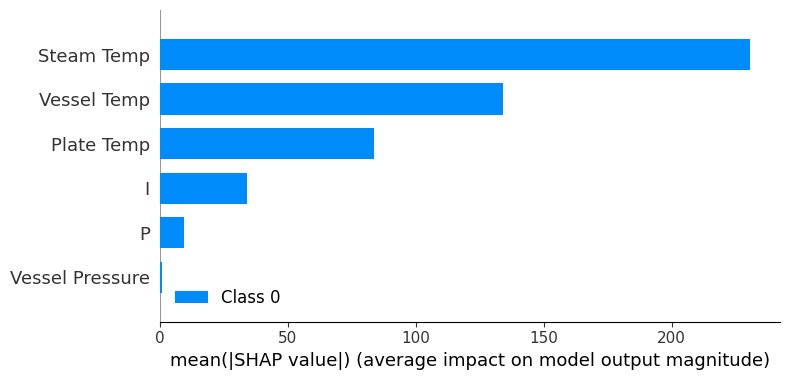

In [52]:
shap.summary_plot(shap_values,ValidData,feature_names=features)

In [37]:
shap.plots.scatter(shap_values)

AssertionError: The shap_values paramemter must be a shap.Explanation object!

In [28]:
# shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:]  ,ValidData[0,:],feature_names=features)

TypeError: list indices must be integers or slices, not tuple

In [ ]:
LoadModel = keras.models.load_model('./Model/Model_15.h5')
hist_15 = LoadModel.fit(TrainData, TrainLabel, validation_data=(ValidData, ValidLabel), epochs=50000, verbose = 1)

In [ ]:
idx = Final_Acc.sort_values(by='V_MAPE').iloc[0, 0]
result = pd.read_csv('./Result/Result_%d.csv'%(idx), header = None)
result

In [ ]:
idx = Final_Acc.sort_values(by='V_MAPE').iloc[4, 0]
result = pd.read_csv('./Result/Result_%d.csv'%(idx), header = None)


plt.plot(result.iloc[:, 1])
plt.plot(result.iloc[:, 3])
plt.grid()

plt.show()